In [1]:
import os
import scipy
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from scipy import stats
from pandas import DataFrame
from xgboost import plot_importance
from sklearn import preprocessing as pp

from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [2]:
path_head = "C:/Users/asus/Desktop/CMP_data/DATA SET/CMP-data/training/"
path_tail = "CMP-training-180"
path_type = ".csv"
f = open(path_head + path_tail + path_type)
data = pd.read_csv(f)

In [3]:
data

,MACHINE_ID,MACHINE_DATA,TIMESTAMP,WAFER_ID,STAGE,CHAMBER,USAGE_OF_BACKING_FILM,USAGE_OF_DRESSER,USAGE_OF_POLISHING_TABLE,USAGE_OF_DRESSER_TABLE,...,USAGE_OF_MEMBRANE,USAGE_OF_PRESSURIZED_SHEET,SLURRY_FLOW_LINE_A,SLURRY_FLOW_LINE_B,SLURRY_FLOW_LINE_C,WAFER_ROTATION,STAGE_ROTATION,HEAD_ROTATION,DRESSING_WATER_STATUS,EDGE_AIR_BAG_PRESSURE
0,2,4,4.871346e+08,2655292712,B,4,8538.333333,611.111111,11.111111,4266.0,...,101.245059,2561.50,2.222222,0.909091,0.0,0.000000,0.000000,156.8,1.0,0.000000
1,2,4,4.871346e+08,2655292712,B,4,8538.333333,611.111111,11.111111,4266.0,...,101.245059,2561.50,2.222222,0.909091,0.0,0.000000,0.000000,156.8,1.0,0.000000
2,2,4,4.871346e+08,2655292712,B,4,8538.333333,611.111111,11.111111,4266.0,...,101.245059,2561.50,2.222222,0.909091,0.0,0.000000,0.000000,156.8,0.0,0.000000
3,2,4,4.871346e+08,2655292712,B,4,8538.333333,611.111111,11.111111,4266.0,...,101.245059,2561.50,2.222222,0.909091,145.6,0.000000,0.000000,156.8,0.0,0.000000
4,2,4,4.871346e+08,2655292712,B,4,8538.333333,611.111111,11.111111,4266.0,...,101.245059,2561.50,2.222222,0.909091,280.0,0.000000,0.000000,156.8,0.0,0.000000
5,2,4,4.871346e+08,2655292712,B,4,8538.333333,611.111111,11.111111,4266.0,...,101.245059,2561.50,2.222222,0.909091,338.8,0.000000,0.000000,156.8,0.0,0.000000
6,2,4,4.871346e+08,2655292712,B,4,8538.333333,611.111111,11.111111,4266.0,...,101.245059,2561.50,2.222222,0.909091,372.4,0.000000,0.000000,156.8,0.0,0.000000
7,2,4,4.871346e+08,2655292712,B,4,8538.333333,611.111111,11.111111,4266.0,...,101.245059,2561.50,2.222222,0.909091,414.4,0.000000,0.000000,160.0,0.0,0.000000
8,2,4,4.871347e+08,2655292712,B,4,8538.333333,611.111111,11.111111,4266.0,...,101.245059,2561.50,2.222222,0.909091,431.2,0.000000,0.000000,156.8,0.0,0.000000
9,2,4,4.871347e+08,2655292712,B,4,8538.333333,611.111111,11.111111,4266.0,...,101.245059,2561.50,2.222222,0.909091,448.0,0.000000,0.000000,156.8,0.0,0.000000


In [4]:
class Bindfiles:
    
    @classmethod
    def read_files(cls, path, header=True):
        dirs = os.listdir(path)
        dfs = []
        for file in dirs:
            filename = path + '/' + file
            df = pd.read_csv(filename)
            dfs.append(df)
        df = pd.concat(dfs, ignore_index = True)
        return df 

    @classmethod
    def save_to_csv(cls, df, savename):
        df.to_csv(savename)
        return None

In [5]:
if __name__ == "__main__":
    path1 = "C:/Users/asus/Desktop/CMP_data/DATA SET/CMP-data/training"
    #savename = path + '/' + "bind.csv"
    df_training = Bindfiles.read_files(path1)
    # Bindfiles.save_to_csv(df, savename)
    
    path2 = "C:/Users/asus/Desktop/CMP_data/VALIDATION DATA SET/validation/"
    df_validation = Bindfiles.read_files(path2)

In [6]:
df_training

,MACHINE_ID,MACHINE_DATA,TIMESTAMP,WAFER_ID,STAGE,CHAMBER,USAGE_OF_BACKING_FILM,USAGE_OF_DRESSER,USAGE_OF_POLISHING_TABLE,USAGE_OF_DRESSER_TABLE,...,USAGE_OF_MEMBRANE,USAGE_OF_PRESSURIZED_SHEET,SLURRY_FLOW_LINE_A,SLURRY_FLOW_LINE_B,SLURRY_FLOW_LINE_C,WAFER_ROTATION,STAGE_ROTATION,HEAD_ROTATION,DRESSING_WATER_STATUS,EDGE_AIR_BAG_PRESSURE
0,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,110.306324,2790.75,2.222222,0.909091,565.6,34.651163,0.000000,156.8,1.0,60.909091
1,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,110.306324,2790.75,2.222222,0.909091,568.4,34.651163,0.000000,156.8,1.0,60.909091
2,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,110.306324,2790.75,2.222222,0.909091,568.4,34.651163,0.000000,156.8,1.0,60.909091
3,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,110.306324,2790.75,2.222222,0.909091,568.4,34.651163,0.000000,156.8,1.0,60.606061
4,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,110.306324,2790.75,2.222222,0.909091,571.2,34.651163,0.000000,156.8,1.0,60.909091
5,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,110.306324,2790.75,2.222222,0.909091,571.2,34.651163,0.000000,156.8,1.0,60.606061
6,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,110.306324,2790.75,2.222222,0.909091,574.0,34.883721,0.000000,156.8,1.0,60.606061
7,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,110.306324,2790.75,2.222222,0.909091,576.8,34.883721,0.000000,156.8,1.0,60.606061
8,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,110.306324,2790.75,2.222222,0.909091,576.8,34.883721,0.000000,156.8,1.0,60.909091
9,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,110.306324,2790.75,2.222222,0.909091,576.8,34.883721,0.000000,156.8,1.0,60.606061


In [7]:
df_validation

,MACHINE_ID,MACHINE_DATA,TIMESTAMP,WAFER_ID,STAGE,CHAMBER,USAGE_OF_BACKING_FILM,USAGE_OF_DRESSER,USAGE_OF_POLISHING_TABLE,USAGE_OF_DRESSER_TABLE,...,USAGE_OF_MEMBRANE,USAGE_OF_PRESSURIZED_SHEET,SLURRY_FLOW_LINE_A,SLURRY_FLOW_LINE_B,SLURRY_FLOW_LINE_C,WAFER_ROTATION,STAGE_ROTATION,HEAD_ROTATION,DRESSING_WATER_STATUS,EDGE_AIR_BAG_PRESSURE
0,2,4,4.816382e+08,-2697400572,B,4.0,9333.333333,535.185185,320.000000,2667.00,...,110.671937,2800.00,2.222222,0.909091,0.0,0.000000,0.000000,160.0,1.0,0.000000
1,2,4,4.816382e+08,-2697400572,B,4.0,9333.333333,535.185185,320.000000,2667.00,...,110.671937,2800.00,2.222222,0.909091,0.0,0.000000,0.000000,160.0,1.0,0.000000
2,2,4,4.816382e+08,-2697400572,B,4.0,9333.333333,535.185185,320.000000,2667.00,...,110.671937,2800.00,3.888889,0.909091,72.8,0.000000,0.000000,160.0,1.0,0.000000
3,2,4,4.816382e+08,-2697400572,B,4.0,9333.333333,535.185185,320.000000,2667.00,...,110.671937,2800.00,14.027778,0.909091,235.2,0.000000,0.000000,160.0,1.0,0.000000
4,2,4,4.816382e+08,-2697400572,B,4.0,9333.333333,535.185185,320.000000,2667.00,...,110.671937,2800.00,17.083333,0.909091,305.2,0.000000,0.000000,156.8,1.0,0.000000
5,2,4,4.816382e+08,-2697400572,B,4.0,9333.333333,535.185185,320.000000,2667.00,...,110.671937,2800.00,19.444444,0.909091,364.0,0.000000,0.000000,156.8,1.0,0.000000
6,2,4,4.816382e+08,-2697400572,B,4.0,9333.333333,535.185185,320.000000,2667.00,...,110.671937,2800.00,20.833333,0.909091,397.6,0.000000,0.000000,156.8,1.0,0.000000
7,2,4,4.816382e+08,-2697400572,B,4.0,9333.333333,535.185185,320.000000,2667.00,...,110.671937,2800.00,21.666667,0.909091,420.0,0.000000,0.000000,156.8,1.0,0.000000
8,2,4,4.816382e+08,-2697400572,B,4.0,9333.333333,535.185185,320.000000,2667.00,...,110.671937,2800.00,22.361111,0.909091,436.8,0.000000,0.000000,156.8,1.0,0.000000
9,2,4,4.816382e+08,-2697400572,B,4.0,9333.333333,535.185185,320.000000,2667.00,...,110.671937,2800.00,22.638889,0.909091,448.0,0.000000,0.000000,160.0,1.0,0.000000


In [8]:
df = pd.concat([df_training, df_validation], ignore_index = True)
df

,MACHINE_ID,MACHINE_DATA,TIMESTAMP,WAFER_ID,STAGE,CHAMBER,USAGE_OF_BACKING_FILM,USAGE_OF_DRESSER,USAGE_OF_POLISHING_TABLE,USAGE_OF_DRESSER_TABLE,...,USAGE_OF_MEMBRANE,USAGE_OF_PRESSURIZED_SHEET,SLURRY_FLOW_LINE_A,SLURRY_FLOW_LINE_B,SLURRY_FLOW_LINE_C,WAFER_ROTATION,STAGE_ROTATION,HEAD_ROTATION,DRESSING_WATER_STATUS,EDGE_AIR_BAG_PRESSURE
0,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,110.306324,2790.75,2.222222,0.909091,565.6,34.651163,0.000000,156.8,1.0,60.909091
1,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,110.306324,2790.75,2.222222,0.909091,568.4,34.651163,0.000000,156.8,1.0,60.909091
2,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,110.306324,2790.75,2.222222,0.909091,568.4,34.651163,0.000000,156.8,1.0,60.909091
3,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,110.306324,2790.75,2.222222,0.909091,568.4,34.651163,0.000000,156.8,1.0,60.606061
4,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,110.306324,2790.75,2.222222,0.909091,571.2,34.651163,0.000000,156.8,1.0,60.909091
5,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,110.306324,2790.75,2.222222,0.909091,571.2,34.651163,0.000000,156.8,1.0,60.606061
6,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,110.306324,2790.75,2.222222,0.909091,574.0,34.883721,0.000000,156.8,1.0,60.606061
7,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,110.306324,2790.75,2.222222,0.909091,576.8,34.883721,0.000000,156.8,1.0,60.606061
8,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,110.306324,2790.75,2.222222,0.909091,576.8,34.883721,0.000000,156.8,1.0,60.909091
9,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,110.306324,2790.75,2.222222,0.909091,576.8,34.883721,0.000000,156.8,1.0,60.606061


In [34]:
path_head = "C:/Users/asus/Desktop/CMP_data/DATA SET/"
path_tail = "CMP-training-removalrate"
path_type = ".csv"
f = open(path_head + path_tail + path_type)
training_label = pd.read_csv(f)
training_label

,WAFER_ID,STAGE,AVG_REMOVAL_RATE
0,-4224160600,A,61.65480
1,-4224160584,B,75.86415
2,-4224160580,B,71.90700
3,-4113511818,A,65.02230
4,-4113511814,A,58.27905
5,-4113511780,A,61.04565
6,-2697400536,B,69.83865
7,-873170248,A,55.66965
8,371447024,A,149.13090
9,371447028,A,152.04915


In [35]:
path_head = "C:/Users/asus/Desktop/CMP_data/TestValidationAnswers/PHM16TestValidationAnswers/"
path_tail = "orig_CMP-validation-removalrate"
path_type = ".csv"
f = open(path_head + path_tail + path_type)
validation_label = pd.read_csv(f)
validation_label

,WAFER_ID,STAGE,AVG_REMOVAL_RATE
0,-4224160702,A,62.80485
1,-4113511822,A,60.81720
2,-2697400572,B,65.16330
3,-2697400556,B,63.24015
4,-2697400354,B,62.39955
5,-875170112,A,61.93845
6,-4113511804,A,55.00080
7,-4113511784,A,58.55055
8,-4224160686,B,63.90120
9,-4113511800,A,62.89740


In [36]:
label = pd.concat([training_label, validation_label], ignore_index = True)
label

,WAFER_ID,STAGE,AVG_REMOVAL_RATE
0,-4224160600,A,61.65480
1,-4224160584,B,75.86415
2,-4224160580,B,71.90700
3,-4113511818,A,65.02230
4,-4113511814,A,58.27905
5,-4113511780,A,61.04565
6,-2697400536,B,69.83865
7,-873170248,A,55.66965
8,371447024,A,149.13090
9,371447028,A,152.04915


In [37]:
print(label["AVG_REMOVAL_RATE"].describe(include="all"))
print(label["AVG_REMOVAL_RATE"][label["AVG_REMOVAL_RATE"] > 300])

count    2405.000000
mean       96.711704
std       170.575808
min        53.426550
25%        72.186000
50%        78.944550
75%        88.487700
max      4326.154050
Name: AVG_REMOVAL_RATE, dtype: float64
892     4202.11245
894     4182.41655
897     4129.49400
1675    4326.15405
Name: AVG_REMOVAL_RATE, dtype: float64


In [38]:
label.iloc[[892, 894, 897, 1675], :]     #异常标签

,WAFER_ID,STAGE,AVG_REMOVAL_RATE
892,1834206730,A,4202.11245
894,1834206944,A,4182.41655
897,1834206972,A,4129.49400
1675,2058207580,A,4326.15405


In [ ]:
###剔除异常标签

In [39]:
label = label.drop([892, 894, 897, 1675], inplace = False).reset_index(drop = True)
label

,WAFER_ID,STAGE,AVG_REMOVAL_RATE
0,-4224160600,A,61.65480
1,-4224160584,B,75.86415
2,-4224160580,B,71.90700
3,-4113511818,A,65.02230
4,-4113511814,A,58.27905
5,-4113511780,A,61.04565
6,-2697400536,B,69.83865
7,-873170248,A,55.66965
8,371447024,A,149.13090
9,371447028,A,152.04915


In [43]:
label.WAFER_ID = label.WAFER_ID.astype("object")
label

,WAFER_ID,STAGE,AVG_REMOVAL_RATE
0,-4224160600,A,61.65480
1,-4224160584,B,75.86415
2,-4224160580,B,71.90700
3,-4113511818,A,65.02230
4,-4113511814,A,58.27905
5,-4113511780,A,61.04565
6,-2697400536,B,69.83865
7,-873170248,A,55.66965
8,371447024,A,149.13090
9,371447028,A,152.04915


In [45]:
label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 3 columns):
WAFER_ID            2401 non-null object
STAGE               2401 non-null object
AVG_REMOVAL_RATE    2401 non-null float64
dtypes: float64(1), object(2)
memory usage: 56.4+ KB


In [46]:
df_label = pd.merge(df, label, on = ["WAFER_ID", "STAGE"], how = "outer")   #剔除异常值后的label与df拼接，一定存在NA
df_label

,MACHINE_ID,MACHINE_DATA,TIMESTAMP,WAFER_ID,STAGE,CHAMBER,USAGE_OF_BACKING_FILM,USAGE_OF_DRESSER,USAGE_OF_POLISHING_TABLE,USAGE_OF_DRESSER_TABLE,...,USAGE_OF_PRESSURIZED_SHEET,SLURRY_FLOW_LINE_A,SLURRY_FLOW_LINE_B,SLURRY_FLOW_LINE_C,WAFER_ROTATION,STAGE_ROTATION,HEAD_ROTATION,DRESSING_WATER_STATUS,EDGE_AIR_BAG_PRESSURE,AVG_REMOVAL_RATE
0,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,2790.75,2.222222,0.909091,565.6,34.651163,0.000000,156.8,1.0,60.909091,149.13090
1,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,2790.75,2.222222,0.909091,568.4,34.651163,0.000000,156.8,1.0,60.909091,149.13090
2,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,2790.75,2.222222,0.909091,568.4,34.651163,0.000000,156.8,1.0,60.909091,149.13090
3,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,2790.75,2.222222,0.909091,568.4,34.651163,0.000000,156.8,1.0,60.606061,149.13090
4,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,2790.75,2.222222,0.909091,571.2,34.651163,0.000000,156.8,1.0,60.909091,149.13090
5,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,2790.75,2.222222,0.909091,571.2,34.651163,0.000000,156.8,1.0,60.606061,149.13090
6,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,2790.75,2.222222,0.909091,574.0,34.883721,0.000000,156.8,1.0,60.606061,149.13090
7,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,2790.75,2.222222,0.909091,576.8,34.883721,0.000000,156.8,1.0,60.606061,149.13090
8,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,2790.75,2.222222,0.909091,576.8,34.883721,0.000000,156.8,1.0,60.909091,149.13090
9,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,2790.75,2.222222,0.909091,576.8,34.883721,0.000000,156.8,1.0,60.606061,149.13090


In [47]:
df_label[df_label.isna().any(axis=1)]   #1322条数据没有y值，即上述剔除了的异常值

,MACHINE_ID,MACHINE_DATA,TIMESTAMP,WAFER_ID,STAGE,CHAMBER,USAGE_OF_BACKING_FILM,USAGE_OF_DRESSER,USAGE_OF_POLISHING_TABLE,USAGE_OF_DRESSER_TABLE,...,USAGE_OF_PRESSURIZED_SHEET,SLURRY_FLOW_LINE_A,SLURRY_FLOW_LINE_B,SLURRY_FLOW_LINE_C,WAFER_ROTATION,STAGE_ROTATION,HEAD_ROTATION,DRESSING_WATER_STATUS,EDGE_AIR_BAG_PRESSURE,AVG_REMOVAL_RATE
302469,2,1,4.844151e+08,1834206730,A,1.0,151.666667,217.037037,211.851852,3477.75,...,45.50,8.888889,0.909091,0.0,0.0,262.631579,156.8,1.0,0.0,NaN
302470,2,1,4.844151e+08,1834206730,A,1.0,151.666667,217.037037,211.851852,3477.75,...,45.50,8.888889,0.909091,0.0,0.0,262.631579,156.8,1.0,0.0,NaN
302471,2,1,4.844151e+08,1834206730,A,1.0,151.666667,217.037037,211.851852,3477.75,...,45.50,7.083333,0.909091,0.0,0.0,262.631579,156.8,1.0,0.0,NaN
302472,2,1,4.844151e+08,1834206730,A,1.0,151.666667,217.037037,211.851852,3477.75,...,45.50,7.083333,0.909091,0.0,0.0,262.631579,156.8,1.0,0.0,NaN
302473,2,1,4.844151e+08,1834206730,A,1.0,151.666667,217.037037,211.851852,3477.75,...,45.50,6.250000,0.909091,0.0,0.0,263.026316,156.8,1.0,0.0,NaN
302474,2,1,4.844151e+08,1834206730,A,1.0,151.666667,217.037037,211.851852,3477.75,...,45.50,6.250000,0.909091,0.0,0.0,263.026316,156.8,1.0,0.0,NaN
302475,2,1,4.844151e+08,1834206730,A,1.0,151.666667,217.037037,211.851852,3477.75,...,45.50,4.722222,0.909091,0.0,0.0,263.026316,156.8,1.0,0.0,NaN
302476,2,1,4.844151e+08,1834206730,A,1.0,151.666667,217.037037,211.851852,3477.75,...,45.50,4.722222,0.909091,0.0,0.0,263.026316,156.8,1.0,0.0,NaN
302477,2,1,4.844151e+08,1834206730,A,1.0,151.666667,217.037037,211.851852,3477.75,...,45.50,4.166667,0.909091,0.0,0.0,262.631579,156.8,1.0,0.0,NaN
302478,2,1,4.844151e+08,1834206730,A,1.0,151.666667,217.037037,211.851852,3477.75,...,45.50,4.166667,0.909091,0.0,0.0,262.631579,156.8,1.0,0.0,NaN


In [48]:
df_all = df_label.dropna(how = "any").reset_index(drop = True)   #df_label剔除异常值后  df_all
df_all

,MACHINE_ID,MACHINE_DATA,TIMESTAMP,WAFER_ID,STAGE,CHAMBER,USAGE_OF_BACKING_FILM,USAGE_OF_DRESSER,USAGE_OF_POLISHING_TABLE,USAGE_OF_DRESSER_TABLE,...,USAGE_OF_PRESSURIZED_SHEET,SLURRY_FLOW_LINE_A,SLURRY_FLOW_LINE_B,SLURRY_FLOW_LINE_C,WAFER_ROTATION,STAGE_ROTATION,HEAD_ROTATION,DRESSING_WATER_STATUS,EDGE_AIR_BAG_PRESSURE,AVG_REMOVAL_RATE
0,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,2790.75,2.222222,0.909091,565.6,34.651163,0.000000,156.8,1.0,60.909091,149.13090
1,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,2790.75,2.222222,0.909091,568.4,34.651163,0.000000,156.8,1.0,60.909091,149.13090
2,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,2790.75,2.222222,0.909091,568.4,34.651163,0.000000,156.8,1.0,60.909091,149.13090
3,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,2790.75,2.222222,0.909091,568.4,34.651163,0.000000,156.8,1.0,60.606061,149.13090
4,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,2790.75,2.222222,0.909091,571.2,34.651163,0.000000,156.8,1.0,60.909091,149.13090
5,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,2790.75,2.222222,0.909091,571.2,34.651163,0.000000,156.8,1.0,60.606061,149.13090
6,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,2790.75,2.222222,0.909091,574.0,34.883721,0.000000,156.8,1.0,60.606061,149.13090
7,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,2790.75,2.222222,0.909091,576.8,34.883721,0.000000,156.8,1.0,60.606061,149.13090
8,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,2790.75,2.222222,0.909091,576.8,34.883721,0.000000,156.8,1.0,60.909091,149.13090
9,2,1,4.816371e+08,371447024,A,1.0,9302.500000,534.074074,292.592593,2666.25,...,2790.75,2.222222,0.909091,576.8,34.883721,0.000000,156.8,1.0,60.606061,149.13090


In [49]:
def check_types(df):
    variable_types = []
    for i in range(len(df.columns)):
        typess = df.iloc[:, i].apply(type).value_counts()
        variable_types.append(typess)
    return variable_types


def astypes(df):
    for i in range(5, len(df.columns)):
        df.iloc[:, i] = df.iloc[:, i].astype("float")   
    return df

In [50]:
check_types(df_all)

[<class 'int'>    815570
 Name: MACHINE_ID, dtype: int64, <class 'int'>    815570
 Name: MACHINE_DATA, dtype: int64, <class 'float'>    815570
 Name: TIMESTAMP, dtype: int64, <class 'int'>    815570
 Name: WAFER_ID, dtype: int64, <class 'str'>    815570
 Name: STAGE, dtype: int64, <class 'float'>    815570
 Name: CHAMBER, dtype: int64, <class 'float'>    815570
 Name: USAGE_OF_BACKING_FILM, dtype: int64, <class 'float'>    815570
 Name: USAGE_OF_DRESSER, dtype: int64, <class 'float'>    815570
 Name: USAGE_OF_POLISHING_TABLE, dtype: int64, <class 'float'>    815570
 Name: USAGE_OF_DRESSER_TABLE, dtype: int64, <class 'float'>    815570
 Name: PRESSURIZED_CHAMBER_PRESSURE, dtype: int64, <class 'float'>    815570
 Name: MAIN_OUTER_AIR_BAG_PRESSURE, dtype: int64, <class 'float'>    815570
 Name: CENTER_AIR_BAG_PRESSURE, dtype: int64, <class 'float'>    815570
 Name: RETAINER_RING_PRESSURE, dtype: int64, <class 'float'>    815570
 Name: RIPPLE_AIR_BAG_PRESSURE, dtype: int64, <class 'float'>

In [51]:
df_all = astypes(df_all)
check_types(df_all)

[<class 'int'>    815570
 Name: MACHINE_ID, dtype: int64, <class 'int'>    815570
 Name: MACHINE_DATA, dtype: int64, <class 'float'>    815570
 Name: TIMESTAMP, dtype: int64, <class 'int'>    815570
 Name: WAFER_ID, dtype: int64, <class 'str'>    815570
 Name: STAGE, dtype: int64, <class 'float'>    815570
 Name: CHAMBER, dtype: int64, <class 'float'>    815570
 Name: USAGE_OF_BACKING_FILM, dtype: int64, <class 'float'>    815570
 Name: USAGE_OF_DRESSER, dtype: int64, <class 'float'>    815570
 Name: USAGE_OF_POLISHING_TABLE, dtype: int64, <class 'float'>    815570
 Name: USAGE_OF_DRESSER_TABLE, dtype: int64, <class 'float'>    815570
 Name: PRESSURIZED_CHAMBER_PRESSURE, dtype: int64, <class 'float'>    815570
 Name: MAIN_OUTER_AIR_BAG_PRESSURE, dtype: int64, <class 'float'>    815570
 Name: CENTER_AIR_BAG_PRESSURE, dtype: int64, <class 'float'>    815570
 Name: RETAINER_RING_PRESSURE, dtype: int64, <class 'float'>    815570
 Name: RIPPLE_AIR_BAG_PRESSURE, dtype: int64, <class 'float'>

In [52]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815570 entries, 0 to 815569
Data columns (total 26 columns):
MACHINE_ID                      815570 non-null object
MACHINE_DATA                    815570 non-null object
TIMESTAMP                       815570 non-null float64
WAFER_ID                        815570 non-null object
STAGE                           815570 non-null object
CHAMBER                         815570 non-null float64
USAGE_OF_BACKING_FILM           815570 non-null float64
USAGE_OF_DRESSER                815570 non-null float64
USAGE_OF_POLISHING_TABLE        815570 non-null float64
USAGE_OF_DRESSER_TABLE          815570 non-null float64
PRESSURIZED_CHAMBER_PRESSURE    815570 non-null float64
MAIN_OUTER_AIR_BAG_PRESSURE     815570 non-null float64
CENTER_AIR_BAG_PRESSURE         815570 non-null float64
RETAINER_RING_PRESSURE          815570 non-null float64
RIPPLE_AIR_BAG_PRESSURE         815570 non-null float64
USAGE_OF_MEMBRANE               815570 non-null float

In [53]:
print(df_all.isna().sum())   
print(df_all.isnull().sum())

MACHINE_ID                      0
MACHINE_DATA                    0
TIMESTAMP                       0
WAFER_ID                        0
STAGE                           0
CHAMBER                         0
USAGE_OF_BACKING_FILM           0
USAGE_OF_DRESSER                0
USAGE_OF_POLISHING_TABLE        0
USAGE_OF_DRESSER_TABLE          0
PRESSURIZED_CHAMBER_PRESSURE    0
MAIN_OUTER_AIR_BAG_PRESSURE     0
CENTER_AIR_BAG_PRESSURE         0
RETAINER_RING_PRESSURE          0
RIPPLE_AIR_BAG_PRESSURE         0
USAGE_OF_MEMBRANE               0
USAGE_OF_PRESSURIZED_SHEET      0
SLURRY_FLOW_LINE_A              0
SLURRY_FLOW_LINE_B              0
SLURRY_FLOW_LINE_C              0
WAFER_ROTATION                  0
STAGE_ROTATION                  0
HEAD_ROTATION                   0
DRESSING_WATER_STATUS           0
EDGE_AIR_BAG_PRESSURE           0
AVG_REMOVAL_RATE                0
dtype: int64
MACHINE_ID                      0
MACHINE_DATA                    0
TIMESTAMP                       0
W

In [54]:
df_all.columns

Index(['MACHINE_ID', 'MACHINE_DATA', 'TIMESTAMP', 'WAFER_ID', 'STAGE',
       'CHAMBER', 'USAGE_OF_BACKING_FILM', 'USAGE_OF_DRESSER',
       'USAGE_OF_POLISHING_TABLE', 'USAGE_OF_DRESSER_TABLE',
       'PRESSURIZED_CHAMBER_PRESSURE', 'MAIN_OUTER_AIR_BAG_PRESSURE',
       'CENTER_AIR_BAG_PRESSURE', 'RETAINER_RING_PRESSURE',
       'RIPPLE_AIR_BAG_PRESSURE', 'USAGE_OF_MEMBRANE',
       'USAGE_OF_PRESSURIZED_SHEET', 'SLURRY_FLOW_LINE_A',
       'SLURRY_FLOW_LINE_B', 'SLURRY_FLOW_LINE_C', 'WAFER_ROTATION',
       'STAGE_ROTATION', 'HEAD_ROTATION', 'DRESSING_WATER_STATUS',
       'EDGE_AIR_BAG_PRESSURE', 'AVG_REMOVAL_RATE'],
      dtype='object')

In [59]:
print(df_all["MACHINE_ID"].value_counts())
print(df_all["MACHINE_DATA"].value_counts())
print(df_all["WAFER_ID"].value_counts())
print(df_all["STAGE"].value_counts())
print(df_all["DRESSING_WATER_STATUS"].value_counts())      #DRESSING_WATER_STATUS为分类变量？CHAMBER也为分类变量？

2    815570
Name: MACHINE_ID, dtype: int64
4    376613
5    171108
6    147750
1     63933
3     31562
2     24604
Name: MACHINE_DATA, dtype: int64
 3021014294    5492
 3015014228    5205
 4201773386    2202
 4229773660    1155
-4226160408    1150
 1475739292    1059
 4181773366    1046
-4224160654    1005
-4019511786     940
-4228160596     892
 31494350       821
 4179773518     816
 2917014230     752
-4224160646     735
-4113511826     731
-4111511824     729
-4113511814     725
-4113511792     725
-873170366      724
-875170112      724
-4113511822     723
-4113511818     722
 4223773476     721
 4187773534     720
-873170354      720
 4173773544     719
-873170362      719
-4224160690     718
-4113511796     718
-4113511784     718
               ... 
 349446900      263
 2062207634     263
 1854206786     263
 1840206984     262
 1852206918     262
 1842206770     262
 2062207560     262
 1840206980     261
 1852207004     261
 1854206822     261
 2064207416     261
 349446662  

In [60]:
df_all.iloc[:, 5:].describe(include="all")
#df["CHAMBER"].apply(type).value_counts()

,CHAMBER,USAGE_OF_BACKING_FILM,USAGE_OF_DRESSER,USAGE_OF_POLISHING_TABLE,USAGE_OF_DRESSER_TABLE,PRESSURIZED_CHAMBER_PRESSURE,MAIN_OUTER_AIR_BAG_PRESSURE,CENTER_AIR_BAG_PRESSURE,RETAINER_RING_PRESSURE,RIPPLE_AIR_BAG_PRESSURE,...,USAGE_OF_PRESSURIZED_SHEET,SLURRY_FLOW_LINE_A,SLURRY_FLOW_LINE_B,SLURRY_FLOW_LINE_C,WAFER_ROTATION,STAGE_ROTATION,HEAD_ROTATION,DRESSING_WATER_STATUS,EDGE_AIR_BAG_PRESSURE,AVG_REMOVAL_RATE
count,815570.000000,815570.000000,815570.000000,815570.000000,815570.000000,815570.000000,815570.000000,815570.000000,815570.000000,815570.000000,...,815570.000000,815570.000000,815570.000000,815570.000000,815570.000000,815570.000000,815570.000000,815570.000000,815570.000000,815570.000000
mean,4.237918,4957.938398,397.812891,172.994958,3491.965189,50.181739,155.934807,40.293144,1224.995083,5.975046,...,1487.381628,4.263834,0.726265,250.229766,12.794624,52.551295,159.831550,0.422854,28.635441,87.330596
std,1.320125,2876.805742,219.110117,94.894618,483.331558,39.178635,133.140514,34.202710,1502.680872,5.043478,...,863.041716,6.699540,0.416999,213.908418,16.327560,91.947031,8.562369,0.494013,24.303187,27.780675
min,1.000000,19.166667,5.185185,0.000000,2664.750000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.426550
25%,4.000000,2414.166667,204.444444,90.370370,3022.750000,0.000000,0.000000,0.000000,0.000000,0.000000,...,724.250000,2.222222,0.909091,0.000000,0.000000,0.000000,156.800000,0.000000,0.000000,71.897850
50%,4.000000,5025.000000,400.740741,173.333333,3534.500000,72.857143,252.000000,61.250000,1446.900000,9.318182,...,1507.500000,2.222222,0.909091,414.400000,0.000000,0.000000,160.000000,0.000000,43.939394,78.264150
75%,5.000000,7303.333333,591.851852,255.555556,3915.750000,77.142857,268.800000,66.875000,1454.700000,10.000000,...,2191.000000,2.222222,0.909091,439.600000,34.651163,65.526316,160.000000,1.000000,48.484848,86.909850
max,6.000000,10532.500000,771.851852,357.037037,4305.750000,189.047619,499.200000,139.375000,10666.500000,22.500000,...,3159.750000,42.638889,12.500000,1092.000000,34.883721,263.552632,192.000000,1.000000,141.515152,162.641700


In [224]:
#   df_all.filter(like="ID",axis=1)  #模糊查找
#   df_all.groupby(["WAFER_ID"]).count()   #分组统计

### 数据标准化

In [61]:
#df_all["AVG_REMOVAL_RATE"] = np.log(df_all["AVG_REMOVAL_RATE"])
df_all.iloc[:, 5:(len(df_all.columns)-1)] = df_all.iloc[:, 5:(len(df_all.columns)-1)].apply(pp.scale)
df_all

,MACHINE_ID,MACHINE_DATA,TIMESTAMP,WAFER_ID,STAGE,CHAMBER,USAGE_OF_BACKING_FILM,USAGE_OF_DRESSER,USAGE_OF_POLISHING_TABLE,USAGE_OF_DRESSER_TABLE,...,USAGE_OF_PRESSURIZED_SHEET,SLURRY_FLOW_LINE_A,SLURRY_FLOW_LINE_B,SLURRY_FLOW_LINE_C,WAFER_ROTATION,STAGE_ROTATION,HEAD_ROTATION,DRESSING_WATER_STATUS,EDGE_AIR_BAG_PRESSURE,AVG_REMOVAL_RATE
0,2,1,4.816371e+08,371447024,A,-2.452737,1.510204,0.621885,1.260321,-1.708384,...,1.510204,-0.304739,0.438434,1.474325,1.338629,-0.571539,-0.354055,1.168282,1.327960,149.13090
1,2,1,4.816371e+08,371447024,A,-2.452737,1.510204,0.621885,1.260321,-1.708384,...,1.510204,-0.304739,0.438434,1.487414,1.338629,-0.571539,-0.354055,1.168282,1.327960,149.13090
2,2,1,4.816371e+08,371447024,A,-2.452737,1.510204,0.621885,1.260321,-1.708384,...,1.510204,-0.304739,0.438434,1.487414,1.338629,-0.571539,-0.354055,1.168282,1.327960,149.13090
3,2,1,4.816371e+08,371447024,A,-2.452737,1.510204,0.621885,1.260321,-1.708384,...,1.510204,-0.304739,0.438434,1.487414,1.338629,-0.571539,-0.354055,1.168282,1.315492,149.13090
4,2,1,4.816371e+08,371447024,A,-2.452737,1.510204,0.621885,1.260321,-1.708384,...,1.510204,-0.304739,0.438434,1.500504,1.338629,-0.571539,-0.354055,1.168282,1.327960,149.13090
5,2,1,4.816371e+08,371447024,A,-2.452737,1.510204,0.621885,1.260321,-1.708384,...,1.510204,-0.304739,0.438434,1.500504,1.338629,-0.571539,-0.354055,1.168282,1.315492,149.13090
6,2,1,4.816371e+08,371447024,A,-2.452737,1.510204,0.621885,1.260321,-1.708384,...,1.510204,-0.304739,0.438434,1.513594,1.352873,-0.571539,-0.354055,1.168282,1.315492,149.13090
7,2,1,4.816371e+08,371447024,A,-2.452737,1.510204,0.621885,1.260321,-1.708384,...,1.510204,-0.304739,0.438434,1.526683,1.352873,-0.571539,-0.354055,1.168282,1.315492,149.13090
8,2,1,4.816371e+08,371447024,A,-2.452737,1.510204,0.621885,1.260321,-1.708384,...,1.510204,-0.304739,0.438434,1.526683,1.352873,-0.571539,-0.354055,1.168282,1.327960,149.13090
9,2,1,4.816371e+08,371447024,A,-2.452737,1.510204,0.621885,1.260321,-1.708384,...,1.510204,-0.304739,0.438434,1.526683,1.352873,-0.571539,-0.354055,1.168282,1.315492,149.13090


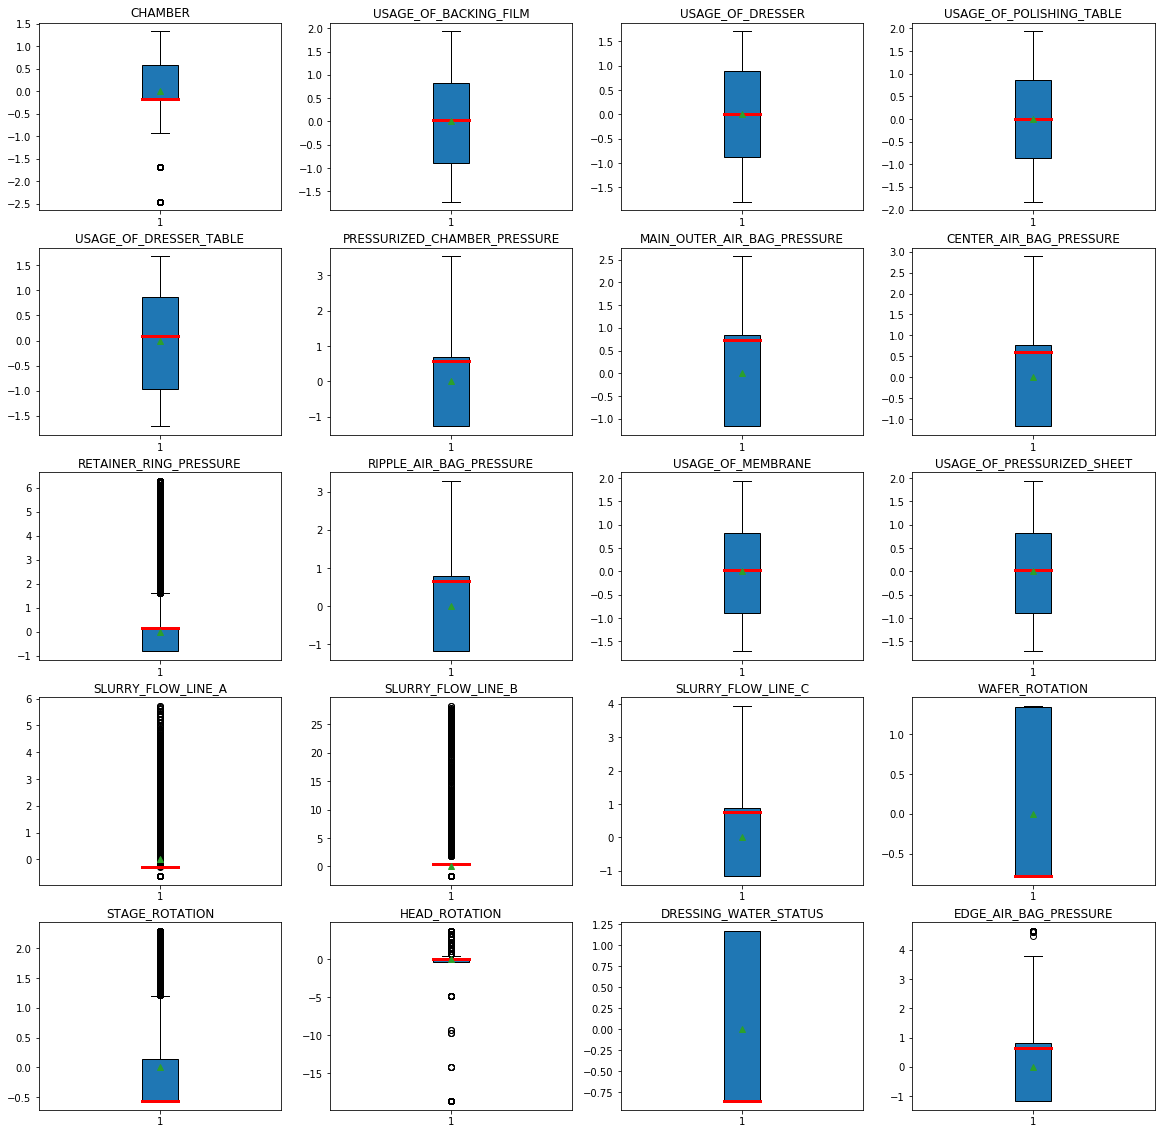

In [62]:
plt.figure(figsize=(20,20))
for i in range(1,21):
    plt.subplot(5, 4, i)
    plt.boxplot(df_all.iloc[:, i + 4], patch_artist = True, showmeans = True, medianprops = dict(color = 'red', linewidth = 3))
    plt.title(df_all.columns[i + 4])

In [228]:
def normal_distribution_check1(df):
    s = []
    p = []
    for i in range(5, len(df.columns)):
        s1 = scipy.stats.shapiro(df.iloc[:, i])[0]
        p1 = scipy.stats.shapiro(df.iloc[:, i])[1]
        s.append(s1)
        p.append(p1)
    return s, p
                                           
def normal_distribution_check2(df):
    s = []
    p = []
    for i in range(5, len(df.columns)):
        s1 = scipy.stats.kstest(df.iloc[:, i], cdf = "norm", alternative = "two-sided")[0]
        p1 = scipy.stats.kstest(df.iloc[:, i], cdf = "norm", alternative = "two-sided")[1]
        s.append(s1)
        p.append(p1)
    return s, p  

In [229]:
normal_distribution_check1(df_all)    #不服从正态分布

([0.8282915949821472,
  0.9619358777999878,
  0.9524152874946594,
  0.9590747952461243,
  0.9478445053100586,
  0.7863495945930481,
  0.7405911684036255,
  0.7589116096496582,
  0.6228600144386292,
  0.7258903384208679,
  0.9619357585906982,
  0.9619358777999878,
  0.5350009799003601,
  0.4443129301071167,
  0.716366171836853,
  0.6405521631240845,
  0.6038336753845215,
  0.3428714871406555,
  0.6288735866546631,
  0.7675240635871887,
  0.8056554794311523],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0])

In [230]:
normal_distribution_check2(df_all)    #不服从正态分布

([0.2812305770867113,
  0.06462621934500923,
  0.07993465665829202,
  0.06331261373083885,
  0.08448298912684093,
  0.30518387592161017,
  0.2752005620602054,
  0.2763718829642493,
  0.32142872782925225,
  0.3032984473552696,
  0.06462624940637218,
  0.06462625406532913,
  0.43447538855751566,
  0.4634755777616322,
  0.28086845716129705,
  0.3910053321366097,
  0.4190197139188846,
  0.42382434069567765,
  0.38113547459733266,
  0.29065674582040363,
  0.9999652962598657],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0])

In [255]:
# def drop_outliers(df):
#     for i in range(5, (len(df.columns) - 1)):
#         df1 = df.iloc[:, i]
#         Q1 = df1.quantile(0.25)    
#         Q3 = df1.quantile(0.75)    
#         IQR = Q3 - Q1
#         rule = (Q3 + 1.5 * IQR < df1) | (Q1 - 1.5 * IQR > df1)
#         index = np.arange(df1.shape[0])[rule]   #异常值对应的索引
#         #outliers = df1.iloc[index]              异常值
#         df = df.drop(index).reset_index(drop=True)
#     return df

# df1 = drop_outliers(df_all)

In [63]:
df_all                     #原始数据标准化后

,MACHINE_ID,MACHINE_DATA,TIMESTAMP,WAFER_ID,STAGE,CHAMBER,USAGE_OF_BACKING_FILM,USAGE_OF_DRESSER,USAGE_OF_POLISHING_TABLE,USAGE_OF_DRESSER_TABLE,...,USAGE_OF_PRESSURIZED_SHEET,SLURRY_FLOW_LINE_A,SLURRY_FLOW_LINE_B,SLURRY_FLOW_LINE_C,WAFER_ROTATION,STAGE_ROTATION,HEAD_ROTATION,DRESSING_WATER_STATUS,EDGE_AIR_BAG_PRESSURE,AVG_REMOVAL_RATE
0,2,1,4.816371e+08,371447024,A,-2.452737,1.510204,0.621885,1.260321,-1.708384,...,1.510204,-0.304739,0.438434,1.474325,1.338629,-0.571539,-0.354055,1.168282,1.327960,149.13090
1,2,1,4.816371e+08,371447024,A,-2.452737,1.510204,0.621885,1.260321,-1.708384,...,1.510204,-0.304739,0.438434,1.487414,1.338629,-0.571539,-0.354055,1.168282,1.327960,149.13090
2,2,1,4.816371e+08,371447024,A,-2.452737,1.510204,0.621885,1.260321,-1.708384,...,1.510204,-0.304739,0.438434,1.487414,1.338629,-0.571539,-0.354055,1.168282,1.327960,149.13090
3,2,1,4.816371e+08,371447024,A,-2.452737,1.510204,0.621885,1.260321,-1.708384,...,1.510204,-0.304739,0.438434,1.487414,1.338629,-0.571539,-0.354055,1.168282,1.315492,149.13090
4,2,1,4.816371e+08,371447024,A,-2.452737,1.510204,0.621885,1.260321,-1.708384,...,1.510204,-0.304739,0.438434,1.500504,1.338629,-0.571539,-0.354055,1.168282,1.327960,149.13090
5,2,1,4.816371e+08,371447024,A,-2.452737,1.510204,0.621885,1.260321,-1.708384,...,1.510204,-0.304739,0.438434,1.500504,1.338629,-0.571539,-0.354055,1.168282,1.315492,149.13090
6,2,1,4.816371e+08,371447024,A,-2.452737,1.510204,0.621885,1.260321,-1.708384,...,1.510204,-0.304739,0.438434,1.513594,1.352873,-0.571539,-0.354055,1.168282,1.315492,149.13090
7,2,1,4.816371e+08,371447024,A,-2.452737,1.510204,0.621885,1.260321,-1.708384,...,1.510204,-0.304739,0.438434,1.526683,1.352873,-0.571539,-0.354055,1.168282,1.315492,149.13090
8,2,1,4.816371e+08,371447024,A,-2.452737,1.510204,0.621885,1.260321,-1.708384,...,1.510204,-0.304739,0.438434,1.526683,1.352873,-0.571539,-0.354055,1.168282,1.327960,149.13090
9,2,1,4.816371e+08,371447024,A,-2.452737,1.510204,0.621885,1.260321,-1.708384,...,1.510204,-0.304739,0.438434,1.526683,1.352873,-0.571539,-0.354055,1.168282,1.315492,149.13090


In [64]:
df_all.WAFER_ID.value_counts()

 3021014294    5492
 3015014228    5205
 4201773386    2202
 4229773660    1155
-4226160408    1150
 1475739292    1059
 4181773366    1046
-4224160654    1005
-4019511786     940
-4228160596     892
 31494350       821
 4179773518     816
 2917014230     752
-4224160646     735
-4113511826     731
-4111511824     729
-4113511814     725
-4113511792     725
-873170366      724
-875170112      724
-4113511822     723
-4113511818     722
 4223773476     721
 4187773534     720
-873170354      720
 4173773544     719
-873170362      719
-4224160690     718
-4113511796     718
-4113511784     718
               ... 
 349446900      263
 2062207634     263
 1854206786     263
 1840206984     262
 1852206918     262
 1842206770     262
 2062207560     262
 1840206980     261
 1852207004     261
 1854206822     261
 2064207416     261
 349446662      261
 327446624      261
 2056207368     260
 1854206806     260
 2078207496     260
 2076207452     260
 1842206774     259
 1846206924     258


In [65]:
df_all_diff = df_all[df_all.groupby(['WAFER_ID'])['STAGE'].transform('nunique') > 1]
df_all_diff.WAFER_ID.value_counts()                           #WAFER_ID相同，STAGE不同

 4229773660    1155
-4226160408    1150
 1475739292    1059
 4181773366    1046
-4224160654    1005
-4228160596     892
 2917014230     752
-4224160646     735
-4113511826     731
-4111511824     729
-4113511814     725
-4113511792     725
-873170366      724
-875170112      724
-4113511822     723
-4113511818     722
 4223773476     721
 4187773534     720
-873170354      720
 4173773544     719
-873170362      719
-4113511784     718
-4224160690     718
-4113511796     718
-4025511554     717
-879170092      716
-4224160650     716
-4023511802     716
-873170272      715
-877170334      715
               ... 
 1488254342     669
 2667292676     669
 2979014172     669
-2567249792     669
 3033014326     669
 1276253680     669
 1288253494     667
 1482254332     666
 2655292676     665
 4213773722     665
 3029014464     664
 1451738976     664
 2665292900     663
 3031014466     662
 4219773496     662
 3031014540     662
 1462254328     661
 3029014472     661
 1332253886     661


### 按照WAFER_ID和STAGE将数据分别存入2401个数据框，形成一个列表

In [66]:
grouper = [g[1] for g in df_all.groupby(['WAFER_ID', 'STAGE'])]
len(grouper)

2401

In [67]:
A=[]
for i in range(len(grouper)):
    if len(set(grouper[i].WAFER_ID)) == 1 and len(set(grouper[i].STAGE)) == 1:
        A.append("True?????????????????")
    else:
        A.append("False@@@")    

"False@@@" in A                                         #检查每个数据框中的WAFER_ID是否相同 以及 STAGE是否也相同

False

In [68]:
B=[]
for i in range(len(grouper)):
    if len(set(grouper[i].AVG_REMOVAL_RATE)) == 1:
        B.append("True1111?????????????????")
    else:
        B.append("False1111@@@")    

"False1111@@@" in B                                     #检查每个数据框中的AVG_REMOVAL_RATE是否相同

False

In [69]:
Df_end = pd.DataFrame()
for i in range(len(grouper)):
    df_igrouper = grouper[i].reset_index(drop = True)
    
    dfc = pd.DataFrame()
    dfc[df_igrouper.columns[3]] = [df_igrouper.iloc[:, 3][0]]
    dfc[df_igrouper.columns[4]] = [df_igrouper.iloc[:, 4][0]]
    
    for j in range(5, (len(df_igrouper.columns) - 1)):
        dfc[df_igrouper.columns[j] + "_mode"] = df_igrouper.iloc[:, j].mode()[0],
        dfc[df_igrouper.columns[j] + "_mean"] = df_igrouper.iloc[:, j].mean(),
        dfc[df_igrouper.columns[j] + "_std"] = df_igrouper.iloc[:, j].std()
    
    dfc[df_igrouper.columns[25]] = [df_igrouper.iloc[:, 25][0]]
    
    Df_end = Df_end.append(dfc)

In [70]:
Df_end = Df_end.reset_index(drop=True)
Df_end

,WAFER_ID,STAGE,CHAMBER_mode,CHAMBER_mean,CHAMBER_std,USAGE_OF_BACKING_FILM_mode,USAGE_OF_BACKING_FILM_mean,USAGE_OF_BACKING_FILM_std,USAGE_OF_DRESSER_mode,USAGE_OF_DRESSER_mean,...,HEAD_ROTATION_mode,HEAD_ROTATION_mean,HEAD_ROTATION_std,DRESSING_WATER_STATUS_mode,DRESSING_WATER_STATUS_mean,DRESSING_WATER_STATUS_std,EDGE_AIR_BAG_PRESSURE_mode,EDGE_AIR_BAG_PRESSURE_mean,EDGE_AIR_BAG_PRESSURE_std,AVG_REMOVAL_RATE
0,-4230160606,B,-0.180224,0.303156,0.604104,-0.624109,-0.624531,0.001366,1.669896,1.669896,...,0.019673,0.037224,0.799045,-0.855958,-0.615509,6.558184e-01,0.629710,0.388602,0.712385,56.29485
1,-4230160598,A,-0.180224,0.327698,0.608249,-1.413758,-1.414024,0.001289,1.079967,1.079967,...,-0.354055,0.025074,0.843861,1.168282,0.319973,1.000222e+00,0.816741,0.407543,0.845838,68.88180
2,-4230160594,A,-0.180224,0.318785,0.604192,-1.385370,-1.385936,0.000741,1.098561,1.099368,...,-0.354055,0.018564,0.801921,-0.855958,-0.603679,6.695962e-01,-1.178259,-0.363720,1.003602,70.63515
3,-4230160594,B,-0.180224,0.494428,0.612903,-1.276453,-1.274310,0.001503,1.193220,1.192566,...,-0.354055,-0.032882,0.686708,-0.855958,0.124533,1.013607e+00,1.702023,0.792291,1.188607,70.05330
4,-4230160436,B,-0.180224,0.309305,0.604616,-0.584713,-0.585757,0.001190,1.691870,1.692647,...,0.019673,0.074848,0.884927,1.168282,0.779222,7.987240e-01,-1.178259,0.508392,1.778183,54.30720
5,-4230160432,A,-0.180224,0.327723,0.609995,0.047064,0.046944,0.001271,-1.342290,-1.341462,...,-0.354055,0.013136,0.810853,-0.855958,-0.501863,7.701418e-01,0.816741,0.421158,0.839513,78.20145
6,-4230160428,A,-0.180224,0.320349,0.606579,0.336158,0.335387,0.000862,-1.132688,-1.131265,...,-0.354055,0.020766,0.845912,1.168282,0.434347,9.745649e-01,-1.178259,-0.344603,0.997607,75.34995
7,-4230160424,A,-0.180224,0.319641,0.605570,-0.030568,-0.031142,0.000751,-1.387929,-1.387929,...,0.019673,0.044661,0.766676,1.168282,0.250313,1.009199e+00,-1.178259,-0.357641,1.006327,78.33015
8,-4230160424,B,-0.180224,0.313895,0.604430,0.142367,0.141668,0.000852,-1.271296,-1.270528,...,0.019673,0.040078,0.782182,1.168282,0.266681,1.007516e+00,-1.178259,-0.412327,0.932093,75.97095
9,-4230160416,B,-0.180224,0.330313,0.617908,-0.506501,-0.506779,0.001361,-1.758114,-1.757313,...,-0.354055,0.027865,0.796618,1.168282,0.341948,9.962878e-01,0.629710,0.302585,0.776769,81.83385


In [71]:
X = Df_end.iloc[:, 2:-1]
y = Df_end.iloc[:, -1]
X_train, X_test, y_train, y_test = TTS(X, y, test_size=0.2, random_state=0)

In [184]:
xg_reg = xgb.XGBRegressor(objective = 'reg:linear', colsample_bytree = 0.4, learning_rate=0.01,
                         max_depth = 8, alpha = 10, n_estimators = 200, subsample = 0.7)

In [185]:
xg_reg.fit(X_train, y_train)

[01:04:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
       colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
       early_stopping_rounds=None, enable_categorical=False,
       eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
       importance_type=None, interaction_constraints='',
       learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
       max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
       missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
       num_parallel_tree=1, objective='reg:linear', predictor='auto',
       random_state=0, reg_alpha=10, reg_lambda=1,
       sampling_method='uniform', scale_pos_weight=1, subsample=0.7,
       tree_method='exact', validate_parameters=1, verbosity=None)

In [187]:
pred = xg_reg.predict(X_test)

In [188]:
MSE(pred, y_test)

211.58003410433525

In [192]:
params = {'booster': 'gbtree',
         'max_depth':25,  
         'gamma':0.3,  
         'min_child_weight':2, 
         'eta':0.3, 
         'objective': 'reg:squarederror'}
num_rounds = 30
dtrain = xgb.DMatrix(X_train, y_train)
bst = xgb.train(params, dtrain, num_rounds)

In [193]:
dtest = xgb.DMatrix(X_test)
ans = bst.predict(dtest)
MSE(ans, y_test)

14.480539526230453

In [437]:
# plot_importance(bst)
# plt.figure(figsize=(100,100))
# plt.show()

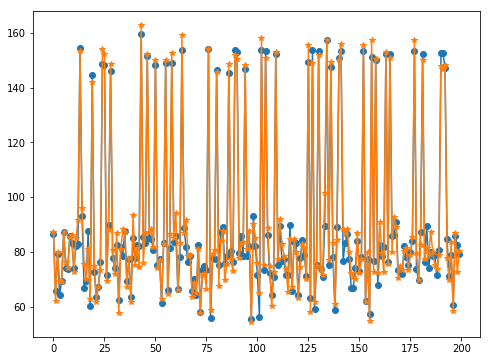

In [191]:
plt.figure(figsize=(8,6))
plt.plot(range(200), ans[0:200], marker='o')
plt.plot(range(200), y_test.values[0:200], marker='*')

### 测试集

In [129]:
if __name__ == "__main__":
    path = "C:/Users/asus/Desktop/CMP_data/DATA SET/CMP-data/test/"
    df_test = Bindfiles.read_files(path)

In [130]:
df_test

,MACHINE_ID,MACHINE_DATA,TIMESTAMP,WAFER_ID,STAGE,CHAMBER,USAGE_OF_BACKING_FILM,USAGE_OF_DRESSER,USAGE_OF_POLISHING_TABLE,USAGE_OF_DRESSER_TABLE,...,USAGE_OF_MEMBRANE,USAGE_OF_PRESSURIZED_SHEET,SLURRY_FLOW_LINE_A,SLURRY_FLOW_LINE_B,SLURRY_FLOW_LINE_C,WAFER_ROTATION,STAGE_ROTATION,HEAD_ROTATION,DRESSING_WATER_STATUS,EDGE_AIR_BAG_PRESSURE
0,2,1,4.816392e+08,373446766,A,1.0,9356.666667,536.296296,341.481481,2667.75,...,110.948617,2807.00,0.000000,0.000000,0.0,0.0,0.000000,156.8,1.0,0.000000
1,2,1,4.816392e+08,373446766,A,1.0,9356.666667,536.296296,341.481481,2667.75,...,110.948617,2807.00,0.000000,0.000000,0.0,0.0,0.000000,156.8,1.0,0.000000
2,2,1,4.816392e+08,373446766,A,1.0,9356.666667,536.296296,341.481481,2667.75,...,110.948617,2807.00,0.000000,0.000000,0.0,0.0,0.000000,156.8,1.0,0.000000
3,2,1,4.816392e+08,373446766,A,1.0,9356.666667,536.296296,341.481481,2667.75,...,110.948617,2807.00,0.000000,0.000000,0.0,0.0,0.000000,156.8,1.0,0.000000
4,2,1,4.816392e+08,373446766,A,1.0,9356.666667,536.296296,341.481481,2667.75,...,110.948617,2807.00,0.000000,0.000000,0.0,0.0,0.000000,160.0,1.0,0.000000
5,2,1,4.816392e+08,373446766,A,1.0,9356.666667,536.296296,341.481481,2667.75,...,110.948617,2807.00,0.000000,0.000000,0.0,0.0,0.000000,160.0,1.0,0.000000
6,2,1,4.816392e+08,373446766,A,1.0,9356.666667,536.296296,341.481481,2667.75,...,110.948617,2807.00,0.000000,0.000000,0.0,0.0,0.000000,156.8,1.0,0.000000
7,2,1,4.816392e+08,373446766,A,1.0,9356.666667,536.296296,341.481481,2667.75,...,110.948617,2807.00,0.000000,0.000000,0.0,0.0,0.000000,156.8,1.0,0.000000
8,2,1,4.816392e+08,373446766,A,1.0,9356.666667,536.296296,341.481481,2667.75,...,110.948617,2807.00,0.000000,0.000000,0.0,0.0,0.000000,156.8,1.0,0.000000
9,2,1,4.816392e+08,373446766,A,1.0,9356.666667,536.296296,341.481481,2667.75,...,110.948617,2807.00,0.000000,0.000000,0.0,0.0,0.000000,156.8,1.0,0.000000


In [131]:
path_head = "C:/Users/asus/Desktop/CMP_data/TestValidationAnswers/PHM16TestValidationAnswers/"
path_tail = "orig_CMP-test-removalrate"
path_type = ".csv"
f = open(path_head + path_tail + path_type)
test_label = pd.read_csv(f)
test_label

,WAFER_ID,STAGE,AVG_REMOVAL_RATE
0,-4224160678,B,66.98130
1,-4224160592,A,56.17860
2,-887170152,B,64.38810
3,373446766,A,153.26100
4,-4224160686,A,57.25230
5,-873170342,A,54.50250
6,-873170244,A,56.64495
7,-4226160404,A,60.44715
8,-4113511760,A,61.41315
9,-873170358,A,63.26625


In [135]:
test_label.WAFER_ID = test_label.WAFER_ID.astype("object")

In [138]:
print(df_test.info())
print(test_label.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156262 entries, 0 to 156261
Data columns (total 25 columns):
MACHINE_ID                      156262 non-null object
MACHINE_DATA                    156262 non-null object
TIMESTAMP                       156262 non-null float64
WAFER_ID                        156262 non-null object
STAGE                           156262 non-null object
CHAMBER                         156262 non-null float64
USAGE_OF_BACKING_FILM           156262 non-null float64
USAGE_OF_DRESSER                156262 non-null float64
USAGE_OF_POLISHING_TABLE        156262 non-null float64
USAGE_OF_DRESSER_TABLE          156262 non-null float64
PRESSURIZED_CHAMBER_PRESSURE    156262 non-null float64
MAIN_OUTER_AIR_BAG_PRESSURE     156262 non-null float64
CENTER_AIR_BAG_PRESSURE         156262 non-null float64
RETAINER_RING_PRESSURE          156262 non-null float64
RIPPLE_AIR_BAG_PRESSURE         156262 non-null float64
USAGE_OF_MEMBRANE               156262 non-null float

In [139]:
df_test_label = pd.merge(df_test, test_label, on = ["WAFER_ID", "STAGE"], how = "outer")
df_test_label

,MACHINE_ID,MACHINE_DATA,TIMESTAMP,WAFER_ID,STAGE,CHAMBER,USAGE_OF_BACKING_FILM,USAGE_OF_DRESSER,USAGE_OF_POLISHING_TABLE,USAGE_OF_DRESSER_TABLE,...,USAGE_OF_PRESSURIZED_SHEET,SLURRY_FLOW_LINE_A,SLURRY_FLOW_LINE_B,SLURRY_FLOW_LINE_C,WAFER_ROTATION,STAGE_ROTATION,HEAD_ROTATION,DRESSING_WATER_STATUS,EDGE_AIR_BAG_PRESSURE,AVG_REMOVAL_RATE
0,2,1,4.816392e+08,373446766,A,1.0,9356.666667,536.296296,341.481481,2667.75,...,2807.00,0.000000,0.000000,0.0,0.0,0.000000,156.8,1.0,0.000000,153.2610
1,2,1,4.816392e+08,373446766,A,1.0,9356.666667,536.296296,341.481481,2667.75,...,2807.00,0.000000,0.000000,0.0,0.0,0.000000,156.8,1.0,0.000000,153.2610
2,2,1,4.816392e+08,373446766,A,1.0,9356.666667,536.296296,341.481481,2667.75,...,2807.00,0.000000,0.000000,0.0,0.0,0.000000,156.8,1.0,0.000000,153.2610
3,2,1,4.816392e+08,373446766,A,1.0,9356.666667,536.296296,341.481481,2667.75,...,2807.00,0.000000,0.000000,0.0,0.0,0.000000,156.8,1.0,0.000000,153.2610
4,2,1,4.816392e+08,373446766,A,1.0,9356.666667,536.296296,341.481481,2667.75,...,2807.00,0.000000,0.000000,0.0,0.0,0.000000,160.0,1.0,0.000000,153.2610
5,2,1,4.816392e+08,373446766,A,1.0,9356.666667,536.296296,341.481481,2667.75,...,2807.00,0.000000,0.000000,0.0,0.0,0.000000,160.0,1.0,0.000000,153.2610
6,2,1,4.816392e+08,373446766,A,1.0,9356.666667,536.296296,341.481481,2667.75,...,2807.00,0.000000,0.000000,0.0,0.0,0.000000,156.8,1.0,0.000000,153.2610
7,2,1,4.816392e+08,373446766,A,1.0,9356.666667,536.296296,341.481481,2667.75,...,2807.00,0.000000,0.000000,0.0,0.0,0.000000,156.8,1.0,0.000000,153.2610
8,2,1,4.816392e+08,373446766,A,1.0,9356.666667,536.296296,341.481481,2667.75,...,2807.00,0.000000,0.000000,0.0,0.0,0.000000,156.8,1.0,0.000000,153.2610
9,2,1,4.816392e+08,373446766,A,1.0,9356.666667,536.296296,341.481481,2667.75,...,2807.00,0.000000,0.000000,0.0,0.0,0.000000,156.8,1.0,0.000000,153.2610


In [141]:
df_test_label = astypes(df_test_label)
check_types(df_test_label)

[<class 'int'>    156262
 Name: MACHINE_ID, dtype: int64, <class 'int'>    156262
 Name: MACHINE_DATA, dtype: int64, <class 'float'>    156262
 Name: TIMESTAMP, dtype: int64, <class 'int'>    156262
 Name: WAFER_ID, dtype: int64, <class 'str'>    156262
 Name: STAGE, dtype: int64, <class 'float'>    156262
 Name: CHAMBER, dtype: int64, <class 'float'>    156262
 Name: USAGE_OF_BACKING_FILM, dtype: int64, <class 'float'>    156262
 Name: USAGE_OF_DRESSER, dtype: int64, <class 'float'>    156262
 Name: USAGE_OF_POLISHING_TABLE, dtype: int64, <class 'float'>    156262
 Name: USAGE_OF_DRESSER_TABLE, dtype: int64, <class 'float'>    156262
 Name: PRESSURIZED_CHAMBER_PRESSURE, dtype: int64, <class 'float'>    156262
 Name: MAIN_OUTER_AIR_BAG_PRESSURE, dtype: int64, <class 'float'>    156262
 Name: CENTER_AIR_BAG_PRESSURE, dtype: int64, <class 'float'>    156262
 Name: RETAINER_RING_PRESSURE, dtype: int64, <class 'float'>    156262
 Name: RIPPLE_AIR_BAG_PRESSURE, dtype: int64, <class 'float'>

In [143]:
# print(df_test_label.isna().sum())   
# print(df_test_label.isnull().sum())

In [144]:
df_test_label.columns

Index(['MACHINE_ID', 'MACHINE_DATA', 'TIMESTAMP', 'WAFER_ID', 'STAGE',
       'CHAMBER', 'USAGE_OF_BACKING_FILM', 'USAGE_OF_DRESSER',
       'USAGE_OF_POLISHING_TABLE', 'USAGE_OF_DRESSER_TABLE',
       'PRESSURIZED_CHAMBER_PRESSURE', 'MAIN_OUTER_AIR_BAG_PRESSURE',
       'CENTER_AIR_BAG_PRESSURE', 'RETAINER_RING_PRESSURE',
       'RIPPLE_AIR_BAG_PRESSURE', 'USAGE_OF_MEMBRANE',
       'USAGE_OF_PRESSURIZED_SHEET', 'SLURRY_FLOW_LINE_A',
       'SLURRY_FLOW_LINE_B', 'SLURRY_FLOW_LINE_C', 'WAFER_ROTATION',
       'STAGE_ROTATION', 'HEAD_ROTATION', 'DRESSING_WATER_STATUS',
       'EDGE_AIR_BAG_PRESSURE', 'AVG_REMOVAL_RATE'],
      dtype='object')

In [145]:
df_test_label.iloc[:, 5:].describe(include="all")

,CHAMBER,USAGE_OF_BACKING_FILM,USAGE_OF_DRESSER,USAGE_OF_POLISHING_TABLE,USAGE_OF_DRESSER_TABLE,PRESSURIZED_CHAMBER_PRESSURE,MAIN_OUTER_AIR_BAG_PRESSURE,CENTER_AIR_BAG_PRESSURE,RETAINER_RING_PRESSURE,RIPPLE_AIR_BAG_PRESSURE,...,USAGE_OF_PRESSURIZED_SHEET,SLURRY_FLOW_LINE_A,SLURRY_FLOW_LINE_B,SLURRY_FLOW_LINE_C,WAFER_ROTATION,STAGE_ROTATION,HEAD_ROTATION,DRESSING_WATER_STATUS,EDGE_AIR_BAG_PRESSURE,AVG_REMOVAL_RATE
count,156262.000000,156262.000000,156262.000000,156262.000000,156262.000000,156262.000000,156262.000000,156262.000000,156262.000000,156262.000000,...,156262.000000,156262.000000,156262.000000,156262.000000,156262.000000,156262.000000,156262.000000,156262.000000,156262.000000,156262.000000
mean,4.414343,4766.253952,366.969295,165.697250,3503.282439,46.868778,145.261842,37.571077,1144.897385,5.582803,...,1429.876285,3.928661,0.674986,233.739435,11.727448,48.216557,145.470679,0.430834,26.691113,86.046636
std,1.337516,3073.756340,217.427839,88.017466,456.650216,39.779474,133.772307,34.437913,1486.758815,5.092386,...,922.126921,6.499958,0.435523,216.040999,16.005966,89.265471,46.479316,0.495195,24.460665,26.591188
min,1.000000,25.000000,6.296296,4.444444,2667.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.502500
25%,4.000000,1966.666667,198.148148,85.925926,3164.750000,0.000000,0.000000,0.000000,0.000000,0.000000,...,590.000000,0.000000,0.000000,0.000000,0.000000,0.000000,156.800000,0.000000,0.000000,72.659850
50%,4.000000,5093.333333,333.703704,174.814815,3476.500000,72.857143,217.200000,55.625000,1443.000000,9.272727,...,1528.000000,2.222222,0.909091,372.400000,0.000000,0.000000,156.800000,0.000000,43.939394,77.050800
75%,6.000000,7240.833333,564.074074,231.111111,3865.000000,77.142857,258.000000,65.937500,1454.700000,10.000000,...,2172.250000,2.222222,0.909091,439.600000,34.651163,65.526316,160.000000,1.000000,48.484848,86.405700
max,6.000000,10532.500000,765.555556,351.111111,4293.500000,183.809524,499.200000,139.375000,10666.500000,20.181818,...,3159.750000,34.166667,12.575758,1072.400000,34.883721,263.552632,192.000000,1.000000,141.515152,163.797150


In [146]:
df_test_label.iloc[:, 5:(len(df_test_label.columns)-1)] = df_test_label.iloc[:, 5:(len(df_test_label.columns)-1)].apply(pp.scale)
df_test_label

,MACHINE_ID,MACHINE_DATA,TIMESTAMP,WAFER_ID,STAGE,CHAMBER,USAGE_OF_BACKING_FILM,USAGE_OF_DRESSER,USAGE_OF_POLISHING_TABLE,USAGE_OF_DRESSER_TABLE,...,USAGE_OF_PRESSURIZED_SHEET,SLURRY_FLOW_LINE_A,SLURRY_FLOW_LINE_B,SLURRY_FLOW_LINE_C,WAFER_ROTATION,STAGE_ROTATION,HEAD_ROTATION,DRESSING_WATER_STATUS,EDGE_AIR_BAG_PRESSURE,AVG_REMOVAL_RATE
0,2,1,4.816392e+08,373446766,A,-2.552757,1.493426,0.778776,1.997158,-1.829705,...,1.493426,-0.604415,-1.549833,-1.081925,-0.732695,-0.540150,0.243751,1.149382,-1.091189,153.2610
1,2,1,4.816392e+08,373446766,A,-2.552757,1.493426,0.778776,1.997158,-1.829705,...,1.493426,-0.604415,-1.549833,-1.081925,-0.732695,-0.540150,0.243751,1.149382,-1.091189,153.2610
2,2,1,4.816392e+08,373446766,A,-2.552757,1.493426,0.778776,1.997158,-1.829705,...,1.493426,-0.604415,-1.549833,-1.081925,-0.732695,-0.540150,0.243751,1.149382,-1.091189,153.2610
3,2,1,4.816392e+08,373446766,A,-2.552757,1.493426,0.778776,1.997158,-1.829705,...,1.493426,-0.604415,-1.549833,-1.081925,-0.732695,-0.540150,0.243751,1.149382,-1.091189,153.2610
4,2,1,4.816392e+08,373446766,A,-2.552757,1.493426,0.778776,1.997158,-1.829705,...,1.493426,-0.604415,-1.549833,-1.081925,-0.732695,-0.540150,0.312599,1.149382,-1.091189,153.2610
5,2,1,4.816392e+08,373446766,A,-2.552757,1.493426,0.778776,1.997158,-1.829705,...,1.493426,-0.604415,-1.549833,-1.081925,-0.732695,-0.540150,0.312599,1.149382,-1.091189,153.2610
6,2,1,4.816392e+08,373446766,A,-2.552757,1.493426,0.778776,1.997158,-1.829705,...,1.493426,-0.604415,-1.549833,-1.081925,-0.732695,-0.540150,0.243751,1.149382,-1.091189,153.2610
7,2,1,4.816392e+08,373446766,A,-2.552757,1.493426,0.778776,1.997158,-1.829705,...,1.493426,-0.604415,-1.549833,-1.081925,-0.732695,-0.540150,0.243751,1.149382,-1.091189,153.2610
8,2,1,4.816392e+08,373446766,A,-2.552757,1.493426,0.778776,1.997158,-1.829705,...,1.493426,-0.604415,-1.549833,-1.081925,-0.732695,-0.540150,0.243751,1.149382,-1.091189,153.2610
9,2,1,4.816392e+08,373446766,A,-2.552757,1.493426,0.778776,1.997158,-1.829705,...,1.493426,-0.604415,-1.549833,-1.081925,-0.732695,-0.540150,0.243751,1.149382,-1.091189,153.2610


In [148]:
# plt.figure(figsize=(20,20))
# for i in range(1,21):
#     plt.subplot(5, 4, i)
#     plt.boxplot(df_test_label.iloc[:, i + 4], patch_artist = True, showmeans = True, medianprops = dict(color = 'red', linewidth = 3))
#     plt.title(df_test_label.columns[i + 4])

In [149]:
df_test_label.WAFER_ID.value_counts()

 2925014266    14678
-4113511760     1321
-4025511544      702
 4181773330      697
 4181773370      697
 3017014518      695
-903170120       687
 41494448        679
 4211773460      677
-3780722714      676
 1482254316      676
-2033929280      382
-873170314       379
-4222160444      373
 4229773718      371
 4225773718      366
-3784722856      366
-2141929708      363
-2141929704      363
 2703293084      362
 4179773510      362
-4220160584      362
 2703293050      362
-873170338       362
-899170202       362
-4025511528      361
-4017511602      360
-879170112       360
 4219773452      360
 1490254104      359
               ...  
 1846206734      272
 2062207670      272
 1842206750      272
 1838206968      271
 1842206960      271
 2064207408      271
 1838206738      271
 349446880       271
 371447012       270
 1852207020      270
 2070207710      270
 1840207004      270
 1846206770      269
 1844206976      269
 2066207650      269
 2058207650      268
 1844207032  

In [150]:
df_test_label_diff = df_test_label[df_test_label.groupby(['WAFER_ID'])['STAGE'].transform('nunique') > 1]
df_test_label_diff.WAFER_ID.value_counts()                           #WAFER_ID相同，STAGE不同

-4025511544    702
 4181773370    697
 4181773330    697
 3017014518    695
-903170120     687
 41494448      679
 4211773460    677
 1482254316    676
-3780722714    676
Name: WAFER_ID, dtype: int64

In [156]:
df_test_label

,MACHINE_ID,MACHINE_DATA,TIMESTAMP,WAFER_ID,STAGE,CHAMBER,USAGE_OF_BACKING_FILM,USAGE_OF_DRESSER,USAGE_OF_POLISHING_TABLE,USAGE_OF_DRESSER_TABLE,...,USAGE_OF_PRESSURIZED_SHEET,SLURRY_FLOW_LINE_A,SLURRY_FLOW_LINE_B,SLURRY_FLOW_LINE_C,WAFER_ROTATION,STAGE_ROTATION,HEAD_ROTATION,DRESSING_WATER_STATUS,EDGE_AIR_BAG_PRESSURE,AVG_REMOVAL_RATE
0,2,1,4.816392e+08,373446766,A,-2.552757,1.493426,0.778776,1.997158,-1.829705,...,1.493426,-0.604415,-1.549833,-1.081925,-0.732695,-0.540150,0.243751,1.149382,-1.091189,153.2610
1,2,1,4.816392e+08,373446766,A,-2.552757,1.493426,0.778776,1.997158,-1.829705,...,1.493426,-0.604415,-1.549833,-1.081925,-0.732695,-0.540150,0.243751,1.149382,-1.091189,153.2610
2,2,1,4.816392e+08,373446766,A,-2.552757,1.493426,0.778776,1.997158,-1.829705,...,1.493426,-0.604415,-1.549833,-1.081925,-0.732695,-0.540150,0.243751,1.149382,-1.091189,153.2610
3,2,1,4.816392e+08,373446766,A,-2.552757,1.493426,0.778776,1.997158,-1.829705,...,1.493426,-0.604415,-1.549833,-1.081925,-0.732695,-0.540150,0.243751,1.149382,-1.091189,153.2610
4,2,1,4.816392e+08,373446766,A,-2.552757,1.493426,0.778776,1.997158,-1.829705,...,1.493426,-0.604415,-1.549833,-1.081925,-0.732695,-0.540150,0.312599,1.149382,-1.091189,153.2610
5,2,1,4.816392e+08,373446766,A,-2.552757,1.493426,0.778776,1.997158,-1.829705,...,1.493426,-0.604415,-1.549833,-1.081925,-0.732695,-0.540150,0.312599,1.149382,-1.091189,153.2610
6,2,1,4.816392e+08,373446766,A,-2.552757,1.493426,0.778776,1.997158,-1.829705,...,1.493426,-0.604415,-1.549833,-1.081925,-0.732695,-0.540150,0.243751,1.149382,-1.091189,153.2610
7,2,1,4.816392e+08,373446766,A,-2.552757,1.493426,0.778776,1.997158,-1.829705,...,1.493426,-0.604415,-1.549833,-1.081925,-0.732695,-0.540150,0.243751,1.149382,-1.091189,153.2610
8,2,1,4.816392e+08,373446766,A,-2.552757,1.493426,0.778776,1.997158,-1.829705,...,1.493426,-0.604415,-1.549833,-1.081925,-0.732695,-0.540150,0.243751,1.149382,-1.091189,153.2610
9,2,1,4.816392e+08,373446766,A,-2.552757,1.493426,0.778776,1.997158,-1.829705,...,1.493426,-0.604415,-1.549833,-1.081925,-0.732695,-0.540150,0.243751,1.149382,-1.091189,153.2610


In [157]:
grouper_test = [g[1] for g in df_test_label.groupby(['WAFER_ID', 'STAGE'])]
len(grouper_test)

424

In [158]:
A=[]
for i in range(len(grouper_test)):
    if len(set(grouper_test[i].WAFER_ID)) == 1 and len(set(grouper_test[i].STAGE)) == 1:
        A.append("True?????????????????")
    else:
        A.append("False@@@")    

"False@@@" in A  

False

In [159]:
B=[]
for i in range(len(grouper_test)):
    if len(set(grouper_test[i].AVG_REMOVAL_RATE)) == 1:
        B.append("True1111?????????????????")
    else:
        B.append("False1111@@@")    

"False1111@@@" in B  

False

In [164]:
Dftest_end = pd.DataFrame()
for i in range(len(grouper_test)):
    df_igrouper = grouper_test[i].reset_index(drop = True)
    
    dfc = pd.DataFrame()
    dfc[df_igrouper.columns[3]] = [df_igrouper.iloc[:, 3][0]]
    dfc[df_igrouper.columns[4]] = [df_igrouper.iloc[:, 4][0]]
    
    for j in range(5, (len(df_igrouper.columns) - 1)):
        dfc[df_igrouper.columns[j] + "_mode"] = df_igrouper.iloc[:, j].mode()[0],
        dfc[df_igrouper.columns[j] + "_mean"] = df_igrouper.iloc[:, j].mean(),
        dfc[df_igrouper.columns[j] + "_std"] = df_igrouper.iloc[:, j].std()
    
    dfc[df_igrouper.columns[25]] = [df_igrouper.iloc[:, 25][0]]
    
    Dftest_end = Dftest_end.append(dfc)

In [165]:
Dftest_end = Dftest_end.reset_index(drop=True)
Dftest_end

,WAFER_ID,STAGE,CHAMBER_mode,CHAMBER_mean,CHAMBER_std,USAGE_OF_BACKING_FILM_mode,USAGE_OF_BACKING_FILM_mean,USAGE_OF_BACKING_FILM_std,USAGE_OF_DRESSER_mode,USAGE_OF_DRESSER_mean,...,HEAD_ROTATION_mode,HEAD_ROTATION_mean,HEAD_ROTATION_std,DRESSING_WATER_STATUS_mode,DRESSING_WATER_STATUS_mean,DRESSING_WATER_STATUS_std,EDGE_AIR_BAG_PRESSURE_mode,EDGE_AIR_BAG_PRESSURE_mean,EDGE_AIR_BAG_PRESSURE_std,AVG_REMOVAL_RATE
0,-4226160404,A,-0.309786,0.178180,0.599555,1.722788,1.722535,0.001258,0.959339,0.960116,...,0.243751,0.313756,0.150357,-0.870033,-0.496696,7.850275e-01,0.890974,0.516334,0.814294,60.44715
1,-4224160686,A,-0.309786,0.179395,0.597869,1.577742,1.577453,0.001219,0.848616,0.849424,...,0.312599,0.319483,0.151839,1.149382,0.278149,1.001599e+00,0.903362,0.567704,0.778680,57.25230
2,-4224160678,B,-0.309786,0.175351,0.598007,1.548733,1.548559,0.001248,0.831582,0.831582,...,0.312599,0.315886,0.148887,1.149382,0.258797,1.004067e+00,0.903362,0.519492,0.750896,66.98130
3,-4224160592,A,-0.309786,0.189372,0.600798,1.485835,1.485579,0.001201,0.773666,0.773666,...,0.243751,0.341650,0.196151,1.149382,0.273913,1.002194e+00,0.705146,0.490853,0.769260,56.17860
4,-4222160444,B,-0.309786,0.153240,0.592904,-0.452083,-0.452405,0.001306,-1.658822,-1.658073,...,0.312599,0.320166,0.144050,-0.870033,-0.648060,6.325001e-01,0.705146,0.470993,0.671345,60.87570
5,-4222160424,B,-0.309786,0.184428,0.599979,-0.405451,-0.405552,0.001246,-1.626457,-1.625639,...,0.243751,0.311237,0.144773,1.149382,0.270880,1.002564e+00,0.705146,0.442117,0.729679,78.17175
6,-4222160392,B,-0.309786,0.183710,0.600678,-0.409518,-0.409794,0.001235,-1.628161,-1.627374,...,0.312599,0.315719,0.145183,-0.870033,-0.561114,7.279463e-01,0.705146,0.406172,0.749357,80.88135
7,-4220160694,B,-0.309786,0.182890,0.596712,0.202656,0.202382,0.001213,-1.134168,-1.134168,...,0.312599,0.319165,0.147423,1.149382,0.285586,1.000556e+00,0.705146,0.412548,0.747044,80.72040
8,-4220160674,B,-0.309786,0.280061,0.610657,0.212145,0.211835,0.000472,-1.125651,-1.126405,...,0.312599,0.325701,0.158299,1.149382,0.450623,9.623017e-01,-1.091189,-0.586517,0.807709,97.10985
9,-4220160654,A,-0.309786,0.181407,0.595399,-0.020470,-0.020961,0.000950,-1.301104,-1.300311,...,0.243751,0.318803,0.160161,1.149382,0.292305,9.995586e-01,-1.091189,0.227396,0.890771,69.84885


In [170]:
Xtest_feature = Dftest_end.iloc[:, 2:-1]
Ytest = Dftest_end.iloc[:, -1]

In [174]:
DD_test = xgb.DMatrix(Xtest_feature)
test_ans = bst.predict(DD_test)
MSE(test_ans, Ytest)

37.20807706017822

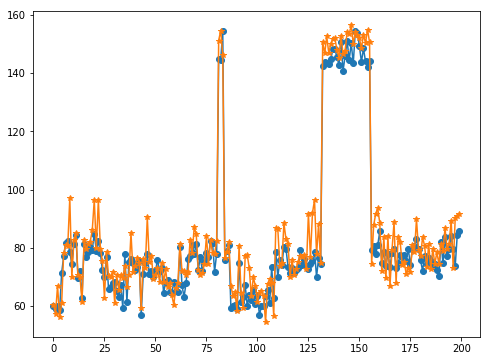

In [175]:
plt.figure(figsize=(8,6))
plt.plot(range(200), test_ans[0:200], marker='o')
plt.plot(range(200), Ytest.values[0:200], marker='*')